Mean R2 score for Adaboost regressor: 0.72


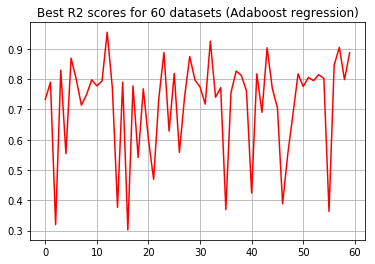

-------------x------------------x---------------

Mean R2 score for Bagging regressor: 0.74


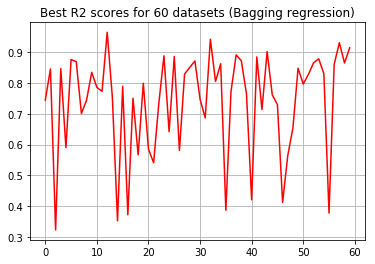

-------------x------------------x---------------

Mean R2 score for DecisionTree regressor: 0.70


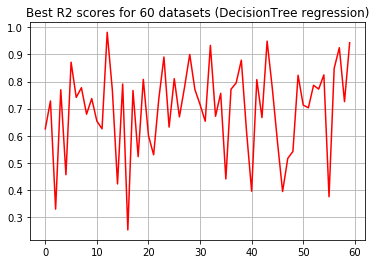

-------------x------------------x---------------

Mean R2 score for ExtraTree regressor: 0.69


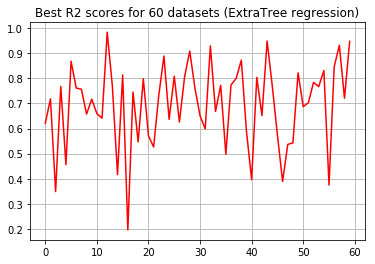

-------------x------------------x---------------

Mean R2 score for KNNeighbours regressor: 0.70


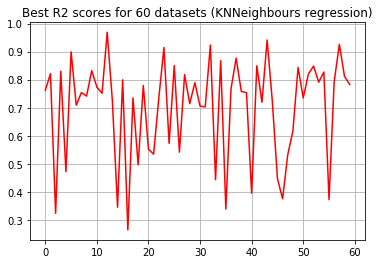

-------------x------------------x---------------

Mean R2 score for LinearSVR regressor: 0.53


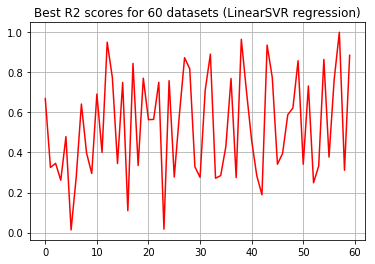

-------------x------------------x---------------

Total time taken: 85 seconds


In [2]:
import sys
import time
import pandas as pd
from matplotlib import pyplot as plt
import os
import numpy as np


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
start_time = time.time()

clf_names = ['Adaboost', 'Bagging', 'DecisionTree', 'ExtraTree', 'KNNeighbours', 'LinearSVR']

for clf in clf_names:
    data_path = "results/" + clf
    files = [f for f in os.listdir(data_path)]
    r2_scores = list()
    for f_name in files:
        f_path = data_path + "/" + f_name
        df = pd.read_csv(f_path, sep="\t")
        rank_test_score = df[df["rank_test_score"] == 1]
        mean_test_score = rank_test_score["mean_test_score"]
        r2_scores.append(mean_test_score.iloc[0])

    print("Mean R2 score for %s regressor: %0.2f" % (clf, np.mean(r2_scores)))

    plt.figure()
    plt.plot(r2_scores, color='r')
    plt.grid(True)
    plt.title(('Best R2 scores for %d datasets (%s regression)' % (len(files), clf)))
    plt.show()
    print("-------------x------------------x---------------")
    print()

end_time = time.time()
print('Total time taken: %d seconds' % int(end_time - start_time))